In [1]:
from keras.datasets import mnist
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

Using TensorFlow backend.


In [2]:
import tensorflow as tf  
tf.__version__

'2.0.0'

In [3]:
#pip install tensorflow
#pip install keras
#pip install opencv-python==3.4.3.18
import cv2
cv2.__version__


'3.4.3'

In [4]:
# prg2

from keras.datasets import mnist

#讀取MNIST資料集
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

# 查看訓練資料
print(len(train_feature), len(train_label))   #60000 60000

# 查看維度
print(train_feature.shape, train_label.shape)   # (60000, 28, 28) (60000,)


60000 60000
(60000, 28, 28) (60000,)


In [5]:
#查看python版本
import sys
sys.version

'3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]'

In [6]:
# 顯示圖片與值
import matplotlib.pyplot as plt
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)  #數字圖片大小
    plt.imshow(image, cmap = 'binary')  #黑白灰階顯示
    plt.show()

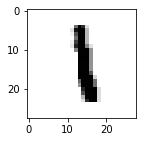

In [7]:
show_image(train_feature[6])  #顯示訓練資料第1個數字

In [8]:
print(train_label[6])    #顯示第1個訓練資料圖片真實值

1


In [9]:
# 顯示多張圖片與值（最多25張）
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

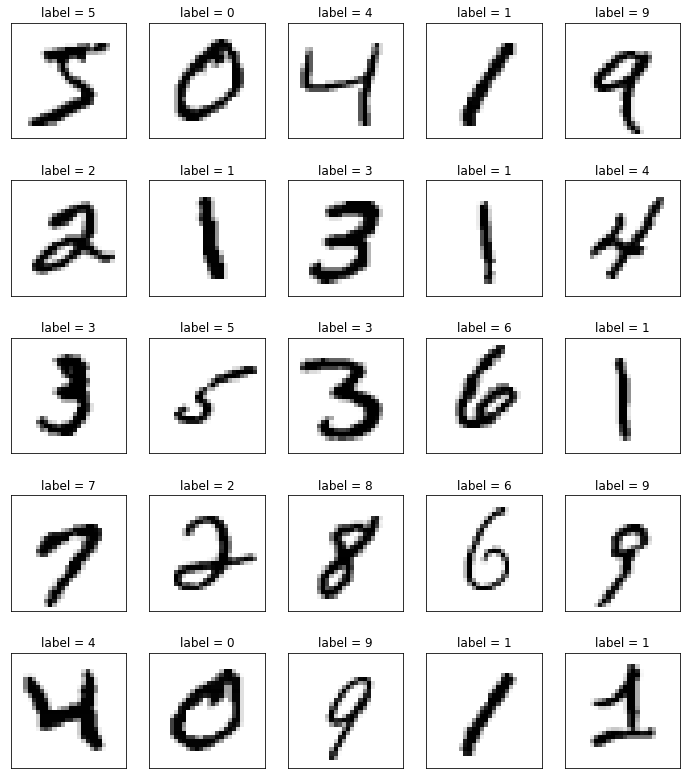

In [10]:
#顯示訓練資料前十筆資料
show_images_labels_predictions(train_feature, train_label,[], 0, 25)

In [11]:
# Prg5
# 以reshape()函數將28*28的數字圖片轉換成784個數字的一維向量，再以astype將每個數字都轉換為float數字
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')

In [12]:
#查看資料
print(train_feature_vector.shape, test_feature_vector.shape)

(60000, 784) (10000, 784)


In [13]:
# 顯示第1筆image資料內容。顯示0~255的浮點數。數字代表圖片中美一個點的灰階值
print(train_feature_vector[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [14]:
# Prg6
# Image標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

In [15]:
#顯示第1筆的image正規化
print(train_feature_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [20]:
# Prg7
# One-Hot Encoding

import numpy as np
from keras.utils import np_utils
np.random.seed(10)

train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [26]:
# Prg8
#建立模型
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

#建立模型
model = Sequential()
#輸入層:784 隱藏層:256 輸出層:10
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))
#定義訓練方式
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])
#資料訓練 訓練資料保留20%做驗證 訓練10次 每次讀取200筆資料 顯示簡易訓練過程
train_history = model.fit(x=train_feature_normalize,
                         y =train_label_onehot,validation_split=0.2,
                         epochs=25, batch_size=200,verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/25
 - 1s - loss: 0.4425 - accuracy: 0.8825 - val_loss: 0.2285 - val_accuracy: 0.9379
Epoch 2/25
 - 1s - loss: 0.1912 - accuracy: 0.9465 - val_loss: 0.1599 - val_accuracy: 0.9535
Epoch 3/25
 - 1s - loss: 0.1362 - accuracy: 0.9613 - val_loss: 0.1258 - val_accuracy: 0.9640
Epoch 4/25
 - 1s - loss: 0.1047 - accuracy: 0.9704 - val_loss: 0.1134 - val_accuracy: 0.9675
Epoch 5/25
 - 1s - loss: 0.0832 - accuracy: 0.9771 - val_loss: 0.1105 - val_accuracy: 0.9680
Epoch 6/25
 - 1s - loss: 0.0678 - accuracy: 0.9815 - val_loss: 0.0950 - val_accuracy: 0.9728
Epoch 7/25
 - 1s - loss: 0.0566 - accuracy: 0.9842 - val_loss: 0.0914 - val_accuracy: 0.9727
Epoch 8/25
 - 1s - loss: 0.0467 - accuracy: 0.9874 - val_loss: 0.0856 - val_accuracy: 0.9745
Epoch 9/25
 - 1s - loss: 0.0387 - accuracy: 0.9896 - val_loss: 0.0860 - val_accuracy: 0.9743
Epoch 10/25
 - 1s - loss: 0.0322 - accuracy: 0.9921 - val_loss: 0.0830 - val_accuracy: 0.9746
Epoch 11/25
 - 1s -

In [27]:
#準確率
scores=model.evaluate(test_feature_normalize,test_label_onehot)
print('\n準確率=',scores[1])

10000/10000 [==============================] - 0s 23us/step

準確率= 0.9800000190734863


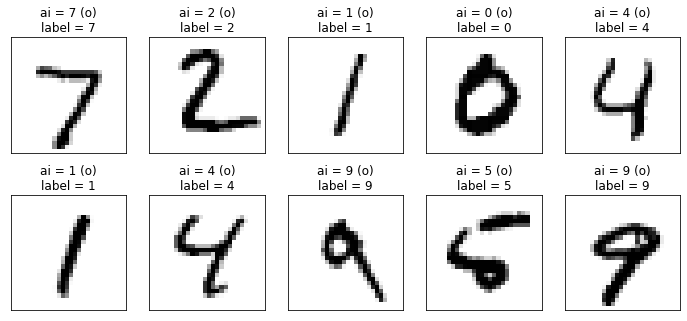

In [24]:
#預測
prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)


In [25]:
# Prg9
# 將模型儲存在 .HDF5檔案中

model.save('Mnist_mlp_model.h5')
print("Mnist_mlp_model.h5 模型儲存完畢")
del model

#載入模型
#load_model('Mnist_ml-Model.h5')


Mnist_mlp_model.h5 模型儲存完畢
